# Introduction

In this project, we aim to use a thorough data-driven research to determine Pittsburgh's best neighborhood. In order to do this, we have developed a composite metric that takes into account important characteristics from several datasets, such as "arrest.csv," "fire.csv," and "play.csv." Our method combines recreational and safety factors to create a thorough assessment of neighborhood desirability.

The Metrics:

Arrests: A neighborhood is considered safer if there are fewer arrests.

Fire Incidents: A reduced number of fire incidents points to infrastructure maintenance and safety.

Playgrounds: More playgrounds indicate better recreational amenities.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
arrestData = pd.read_csv("ArrestData.csv", index_col="_id")
fireData = pd.read_csv("FireData.csv", index_col="_id")
playData = pd.read_csv("PlayData.csv", index_col="_id")

# Arrests

In [9]:
print("Arrest Data:")
print(arrestData.columns)
    
print("\nFire Data:")
print(fireData.columns)

print("\nPlay Data:")
print(playData.columns)

Arrest Data:
Index(['PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION',
       'OFFENSES', 'INCIDENTLOCATION', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE',
       'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

Fire Data:
Index(['call_no', 'incident_type', 'type_description', 'address', 'alarms',
       'alarm_time', 'primary_unit', 'census_tract', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'],
      dtype='object')

Play Data:
Index(['id', 'name', 'equipment_type', 'manufacturer', 'safety_surface_type',
       'ada_accessible', 'street_number', 'street', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'],
      dtype='object')


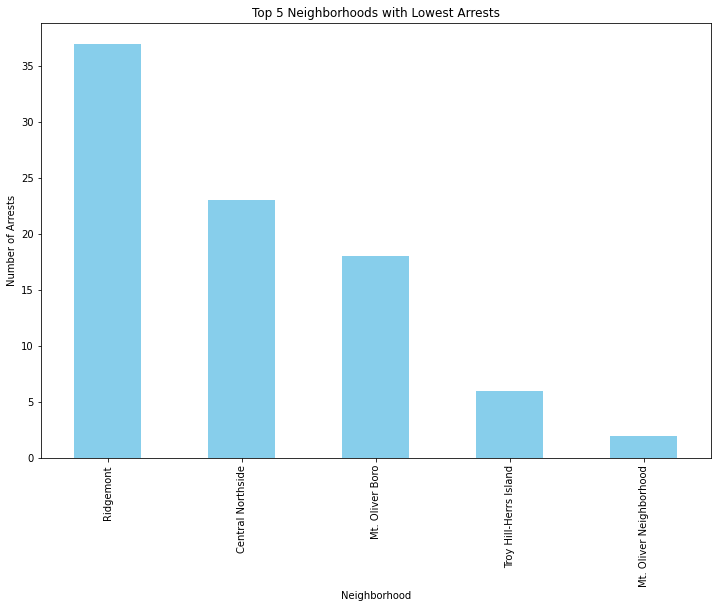

In [49]:
# Group the data by neighborhood and count the number of arrests in each neighborhood
neighborhood_arrests = arrestData['INCIDENTNEIGHBORHOOD'].value_counts()

# Display the bottom 5 neighborhoods with the lowest number of arrests
bottom_neighborhoods = neighborhood_arrests.tail(5)

plt.figure(figsize=(12, 8))
bottom_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighborhoods with Lowest Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.show()

### These numbers are great in comparison to these 5 townships:

In [52]:
neighborhood_arrests.head(5)

Central Business District    4306
South Side Flats             3410
Carrick                      2317
East Allegheny               2172
Homewood South               2064
Name: INCIDENTNEIGHBORHOOD, dtype: int64

## Arrests but the offense is "Propulsion of Missiles"

In [103]:
missileData = arrestData['OFFENSES']

offense_code = '2707'
offense = missileData.str.contains(offense_code, na=False)

filtered_data = missileData[offense]
print(filtered_data.head(5))

_id
30     2701 Simple Assault. / 2707 Propulsion of Miss...
62     2707 Propulsion of Missiles  / 3304(a)(5) CRIM...
729    6106 Firearms not to be Carried without a Lice...
730    6106 Firearms not to be Carried without a Lice...
964    2705 Recklessy Endangering Another Person. / 6...
Name: OFFENSES, dtype: object


In [20]:
arrestData.iloc[2398-1][7]

'2702 Aggravated Assault. / 2705 Recklessy Endangering Another Person. / 2707 Propulsion of Missiles  / 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF'

In [166]:
print(offense.sum())

213


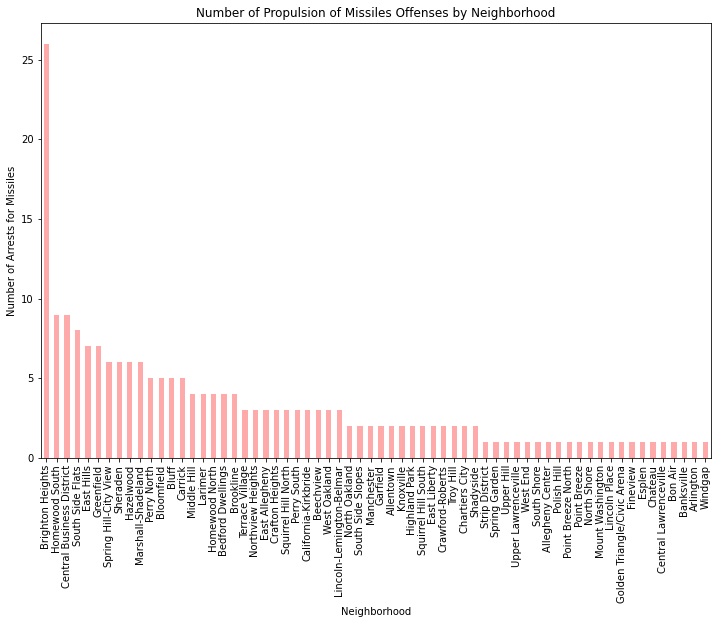

In [47]:
F = arrestData[offense].groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
F.plot(kind='bar', color='#FFAAAA')
plt.title('Number of Propulsion of Missiles Offenses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests for Missiles')
plt.show()

In [31]:
F.mean()

3.25

# Fire Incidents

Bottom 5 Neighborhoods with Least Fire Incidents:


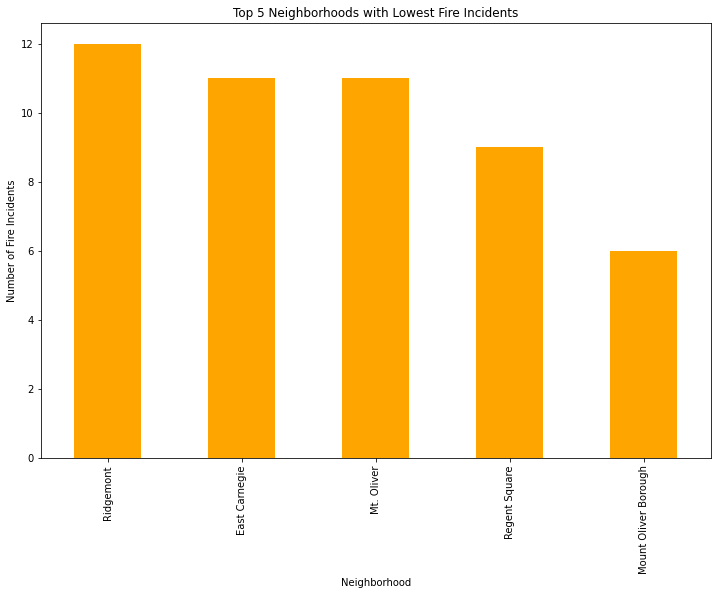

In [36]:
neighborhood_fires = fireData['neighborhood'].value_counts()

# Display the bottom 5 neighborhoods with the least number of fire incidents
bottom_neighborhoods = neighborhood_fires.tail(5)
print("Bottom 5 Neighborhoods with Least Fire Incidents:")

plt.figure(figsize=(12, 8))
bottom_neighborhoods.plot(kind='bar', color='orange')
plt.title('Top 5 Neighborhoods with Lowest Fire Incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')
plt.show()

### Why is the mean so high??

In [98]:
averageFires = neighborhood_fires.mean()
print(averageFires)

89.8021978021978


## List of Neighborhoods who probably have Arsonists:

In [102]:
likelyArsonists = neighborhood_fires[fireData['neighborhood'].value_counts() > averageFires]

print(likelyArsonists)

Carrick                      284
Central Business District    266
South Side Flats             261
Squirrel Hill South          253
Hazelwood                    244
Mount Washington             220
East Liberty                 207
Lincoln-Lemington-Belmar     196
Homewood South               190
Brookline                    189
Shadyside                    183
Homewood North               182
Knoxville                    179
Sheraden                     172
Bloomfield                   172
Perry South                  163
East Hills                   154
Brighton Heights             153
Beechview                    146
Bluff                        143
Marshall-Shadeland           142
East Allegheny               131
Squirrel Hill North          130
Central Northside            130
Beltzhoover                  129
North Oakland                125
Allentown                    125
Larimer                      124
Greenfield                   115
Garfield                     110
Crawford-R

# Number of Playgrounds

Top 5 Neighborhoods with Highest Playground Equipment:
Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
Name: neighborhood, dtype: int64


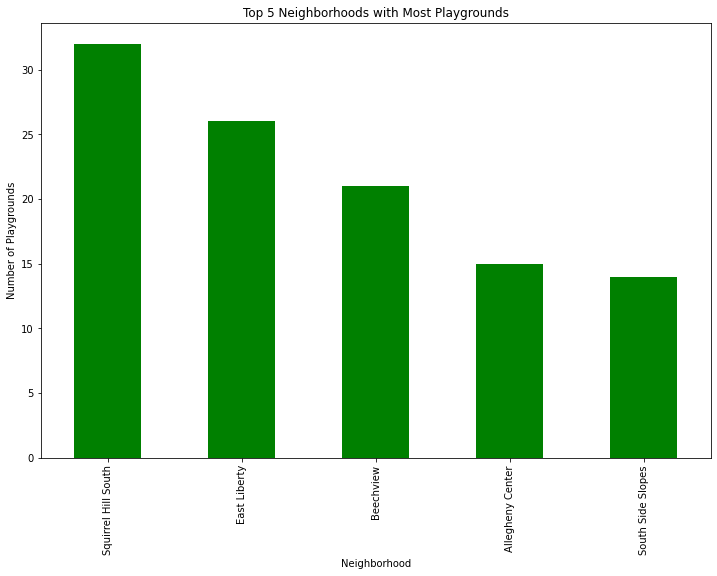

In [54]:
neighborhood_playgrounds = playData['neighborhood'].value_counts()

# Display the top 5 neighborhoods with the highest number of playground equipment
top_neighborhoods = neighborhood_playgrounds.head(5)
print("Top 5 Neighborhoods with Highest Playground Equipment:")
print(top_neighborhoods)

plt.figure(figsize=(12, 8))
top_neighborhoods.plot(kind='bar', color='green')
plt.title('Top 5 Neighborhoods with Most Playgrounds')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Playgrounds')
plt.show()

Consider that South Side Slopes and Squirrel Hill South were also #3 and #4 respectively on the likely arsonists leaderboard

In [113]:
Olivermask = playData['neighborhood'] == 'Mt. Oliver'

playData[Olivermask].head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,


# Conclusion

**Mt. Oliver** Neighborhood is the top candidate for Pittsburgh's greatest neighborhood, according to a data-driven analysis that uses a composite index of safety, fire occurrences, and playground availability. 

This method offers an **unbiased evaluation**, highlighting the neighborhood's superiority in terms of security and leisure facilities.